In [ ]:
'''
q-learner
    -policy
    -value function
    -update()
    -move()
    
portfolio
    -cash
    -assets
    -orderHistory
        -orders[{time, asset, action, amount, value}]
        -show()
    -show()

Notes
    -sharpe ratio = risk/reward
    -volatility = standard deviation
    -momentum = price change over time = (data[n] / data[n-t]) - 1
'''


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

# Read data
filePath = 'data/spy_5yrs.csv'
data = pd.read_csv(filePath,header=0,index_col='date')

# Remove first row (bad data)
data = data.iloc[1:]

# Sort data by index (ascending)
data = data.loc[sorted(data.index)]

# Take only the daily close data and normalize it
data = pd.DataFrame(data['close'])
data['close'] = data['close']/data['close'][0]

In [2]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(center=False, window=window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return values.rolling(center=False, window=window).std()


def get_bollinger_bands(rm, rstd, b=2):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + b*rstd
    lower_band = rm - b*rstd
    return upper_band, lower_band

def get_momentum(values, window):
    momentum = values - values.shift(window)
    return momentum

In [49]:
data

,close
date,
2012/12/07,1.000000
2012/12/10,1.000407
2012/12/11,1.007197
2012/12/12,1.007689
2012/12/13,1.001510
2012/12/14,0.997824
2012/12/17,1.009514
2012/12/18,1.020749
2012/12/19,1.013166


In [3]:
# Define state features
window_mean = 20
window_std = 20
b = 2
window_vol = 5
window_mom = 10

data['rm'] = get_rolling_mean(data['close'], window_mean)
data['rstd'] = get_rolling_std(data['close'], window_std)
data['ubb'], data['lbb'] = get_bollinger_bands(data['rm'],data['rstd'])
data['mom_10'] = get_momentum(data['close'], window_mom)
data['rstd_5'] = get_rolling_std(data['close'], window_vol)

<IPython.core.display.Javascript object>


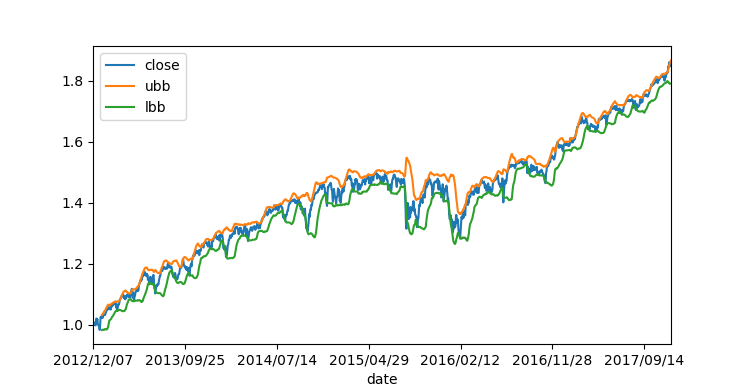

In [7]:
%matplotlib notebook
data[['close','ubb','lbb']].plot()
plt.show()